<a href="https://colab.research.google.com/github/Dev-180Memes/milk-production-prediction/blob/main/Milk_output_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
df = pd.read_excel('/content/raw data for performance of superior dairy cattle sires_2.xlsx')
df.head()

,Animal Number,Animal Name,"Dam, Official Reg. Number (ORN)",Sire Bull ID/ORN,Total Milk Yield (Kg),Corrected Milk (Kg),Length of Lactation,Days Dry (Days),Peak Yield (Kg),Days To Peak (Days)
0,806017,Bente,804195,L.Jet Bowser-ET,6116.56,8071.972792,255.0,74.0,37.3,113.0
1,804528,RICO,802811,L.Jet Bowser XA,4692.00,6116.366396,257.0,85.0,23.1,85.0
2,806100,Sumer,804387,L.Jet Bowser-ET,4905.57,6141.720917,263.0,70.0,25.5,59.0
3,803991,Vacu155,3155,Brasilia,6927.00,8599.412278,269.0,48.0,32.1,24.0
4,803570,Anjani,802132,L.Jet Bowser XA,8082.00,9518.545697,269.0,53.0,35.4,61.0


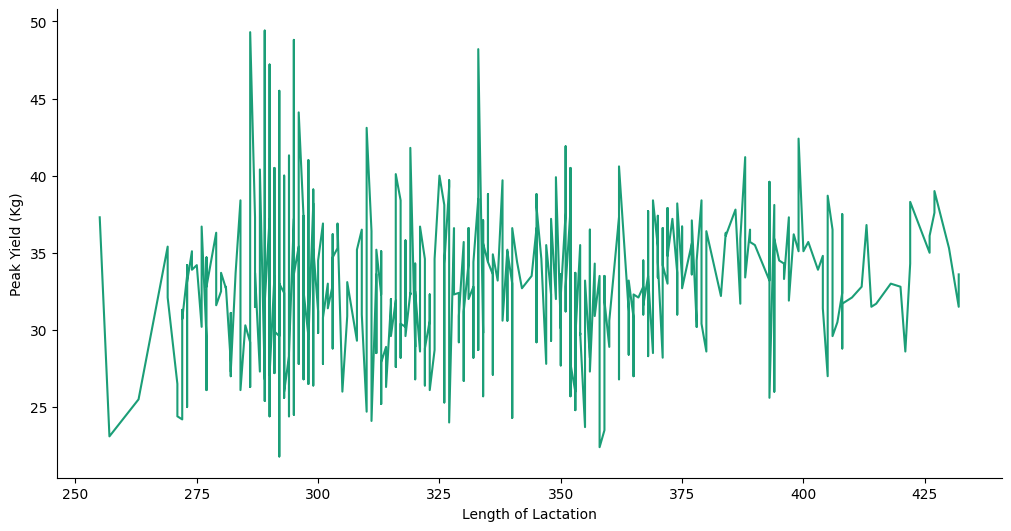

In [25]:
# @title Length of Lactation vs Peak Yield (Kg)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Length of Lactation']
  ys = series['Peak Yield (Kg)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Length of Lactation', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Length of Lactation')
_ = plt.ylabel('Peak Yield (Kg)')

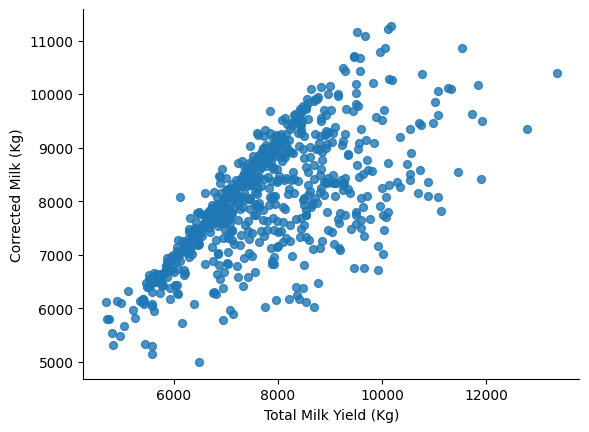

In [24]:
# @title Total Milk Yield (Kg) vs Corrected Milk (Kg)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Total Milk Yield (Kg)', y='Corrected Milk (Kg)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

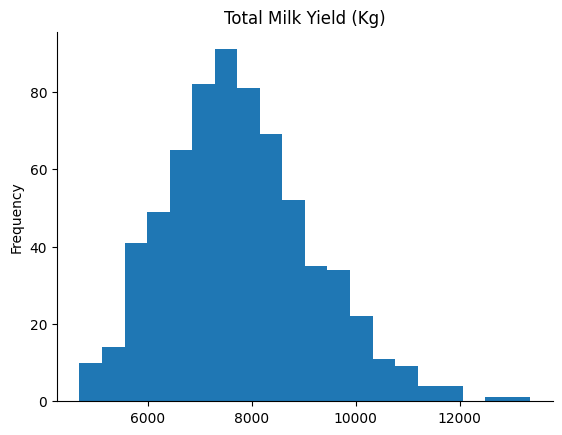

In [23]:
# @title Total Milk Yield (Kg)

from matplotlib import pyplot as plt
df['Total Milk Yield (Kg)'].plot(kind='hist', bins=20, title='Total Milk Yield (Kg)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df.columns

Index(['Animal Number', 'Animal Name', 'Dam, Official Reg. Number (ORN)',
       'Sire Bull ID/ORN', 'Total Milk Yield (Kg)', 'Corrected Milk (Kg)',
       'Length of Lactation', 'Days Dry (Days)', 'Peak Yield (Kg)',
       'Days To Peak (Days)'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Animal Number                    680 non-null    object 
 1   Animal Name                      675 non-null    object 
 2   Dam, Official Reg. Number (ORN)  675 non-null    object 
 3   Sire Bull ID/ORN                 675 non-null    object 
 4   Total Milk Yield (Kg)            680 non-null    float64
 5   Corrected Milk (Kg)              680 non-null    float64
 6   Length of Lactation              680 non-null    float64
 7   Days Dry (Days)                  680 non-null    float64
 8   Peak Yield (Kg)                  680 non-null    float64
 9   Days To Peak (Days)              680 non-null    float64
dtypes: float64(6), object(4)
memory usage: 53.3+ KB


In [15]:
df.dropna(inplace=True)

In [18]:
df.shape

(675, 10)

In [20]:
from sklearn.preprocessing import LabelEncoder
le_name = LabelEncoder()
df['Name'] = le_name.fit_transform(df['Animal Name'])

In [21]:
le_sire = LabelEncoder()
df['Sire'] = le_sire.fit_transform(df['Sire Bull ID/ORN'])

In [22]:
df.head()

,Animal Number,Animal Name,"Dam, Official Reg. Number (ORN)",Sire Bull ID/ORN,Total Milk Yield (Kg),Corrected Milk (Kg),Length of Lactation,Days Dry (Days),Peak Yield (Kg),Days To Peak (Days),Name,Sire
0,806017,Bente,804195,L.Jet Bowser-ET,6116.56,8071.972792,255.0,74.0,37.3,113.0,67,24
1,804528,RICO,802811,L.Jet Bowser XA,4692.00,6116.366396,257.0,85.0,23.1,85.0,420,23
2,806100,Sumer,804387,L.Jet Bowser-ET,4905.57,6141.720917,263.0,70.0,25.5,59.0,472,24
3,803991,Vacu155,3155,Brasilia,6927.00,8599.412278,269.0,48.0,32.1,24.0,515,1
4,803570,Anjani,802132,L.Jet Bowser XA,8082.00,9518.545697,269.0,53.0,35.4,61.0,34,23


In [26]:
df.columns

Index(['Animal Number', 'Animal Name', 'Dam, Official Reg. Number (ORN)',
       'Sire Bull ID/ORN', 'Total Milk Yield (Kg)', 'Corrected Milk (Kg)',
       'Length of Lactation', 'Days Dry (Days)', 'Peak Yield (Kg)',
       'Days To Peak (Days)', 'Name', 'Sire'],
      dtype='object')

In [33]:
X = df.drop(['Animal Number', 'Animal Name', 'Dam, Official Reg. Number (ORN)',
       'Sire Bull ID/ORN', 'Days To Peak (Days)', 'Name'],axis=1)
y = df['Days To Peak (Days)']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
y_pred = model.predict(X_test)

In [37]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 36.955555555555556
Mean Squared Error: 2018.4814814814815
Root Mean Squared Error: 44.92751363564961
R2 Score: -1.4326493421162265


In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_pred = model.predict(X_test)

In [40]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 25.072666666666663
Mean Squared Error: 983.1642555555558
Root Mean Squared Error: 31.355450173064902
R2 Score: -0.18489760813361955
